# Random forest regression

Random forest regression combines multiple high-variance regression trees together into a low-variance result. In a regression problem, the output is the mean of all the output of the individual trees, a process called **aggregation**. Random forest also involves the random sampling of rows and features to force an extra robustness element to the models, we call this part **bootstrap**. Combining bootstrapping with aggregation yields **bagging**.

## Implementation

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [18]:
df = pd.read_csv('data/Advertising.csv')
df = df.drop(['Unnamed: 0'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
rf = RandomForestRegressor(n_estimators = 100, random_state=0)
rf.fit(X_train,y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [28]:
# predicting a new result
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6909500000000018
Mean Squared Error: 0.9529349999999995
Root Mean Squared Error: 0.9761838966096499


## Feature importances
The importances represent how much including a particular variable improves the prediction, we can use these numbers to make relative comparisons between variables.

In [39]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X_train.columns), importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TV                   Importance: 0.63
Variable: radio                Importance: 0.36
Variable: newspaper            Importance: 0.01


[None, None, None]

## visualizing feature importance

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

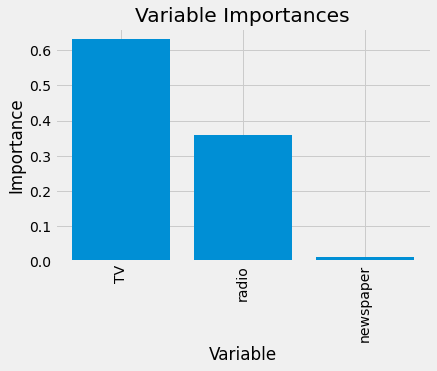

In [40]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, list(X_train.columns), rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In this example, it is obvious that we can exclude newspaper from a revised model

## visualization of a tree

In [38]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [33]:
# Pull out one of the trees
tree = rf.estimators_[5]

# Export to a dot file
export_graphviz(tree, out_file = 'graphs/tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)# Use dot file to create a graph

In [34]:
# Create graph from the dot file
(graph, ) = pydot.graph_from_dot_file('graphs/tree.dot')


In [37]:
graph.write_png('graphs/tree.png')